In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

Representacion discreta del intervalo temporal (ver si queda o no) $[-\pi, \pi]$
 ---------------

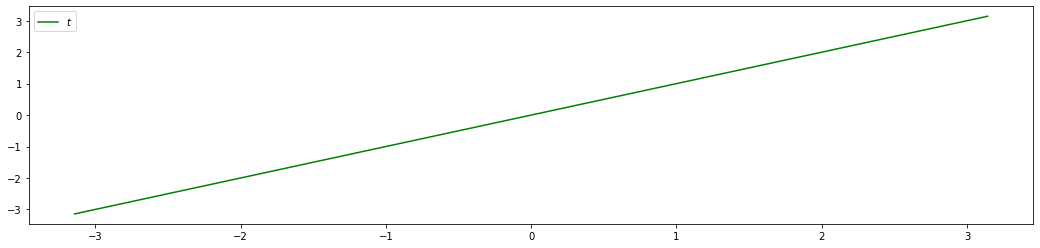

In [2]:
N = 2**10 + 1 # 1025
L = np.pi 
t = np.linspace(-L, L, N)

w = np.copy(t) 
omega = np.copy(t) 
omega_2=np.transpose(omega)*omega
t_2=np.transpose(t)*t

figure, ax = plt.subplots(1,1,figsize=(18,4))
o1 = ax.plot(t, t, 'g',  label='$t$')
ax.legend()


# Ejercicio 1 - Transformada de Fourier y Representacion Frecuencial                


1. Usando la escritura de seno con expoenciales complejas, si $x(t) = 2*\sin(\omega_0t) =  \frac{e^{i\omega_0t}-e^{-i\omega_0t}}{i}$, entonces

$$\hat x(\omega) = \frac{2 \pi}{i}  \left( \delta(\omega-\omega_0) - \delta(\omega+\omega_0)   \right)  $$

y luego

$$|\hat x(\omega)| = 2\pi \left( \delta(\omega-\omega_0) + \delta(\omega+\omega_0)  \right) $$

In [3]:
def funcion1(w0):
    x = 2*np.sin(w0*t) 
    n_w0 = int((L+w0) * N/(2*L))
    minus_n_w0 = int((L-w0) * N/(2*L))
    xhatmod = 2*np.pi*(signal.unit_impulse(N, n_w0) + signal.unit_impulse(N, minus_n_w0))

    fig, ax = plt.subplots(1, 2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-',  label='$x, w0=$'+str(w0))
    o2 = ax[1].plot(w, xhatmod, 'r-', label='modulo de $\hat x$')
    ax[0].legend()
    ax[1].legend()


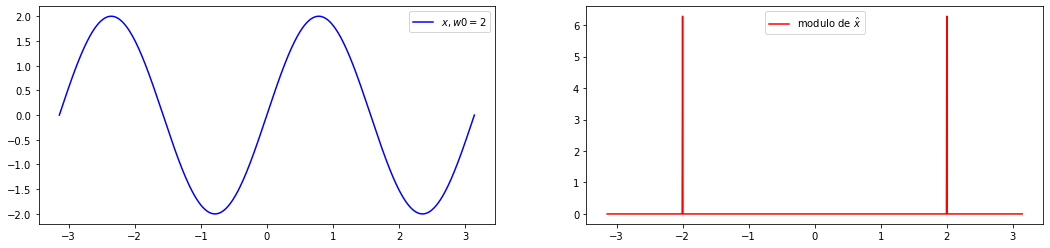

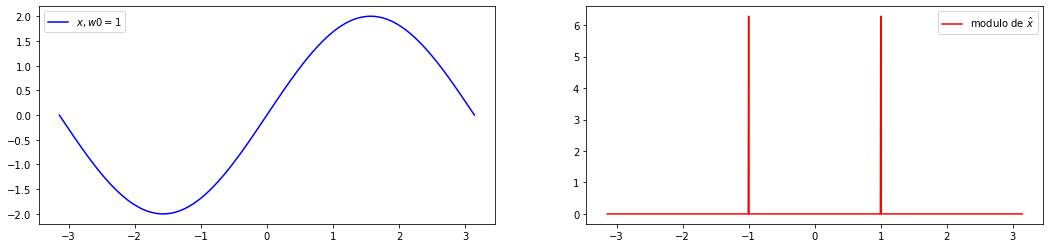

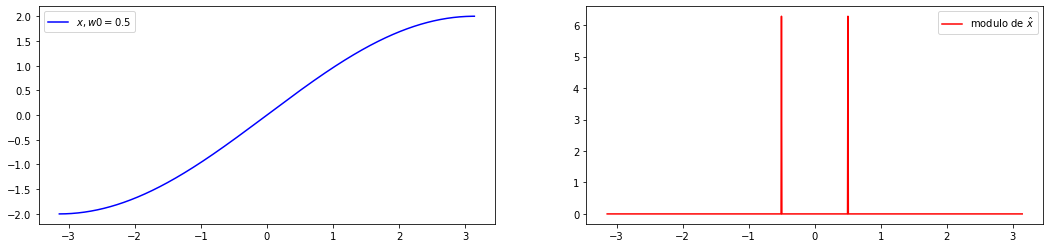

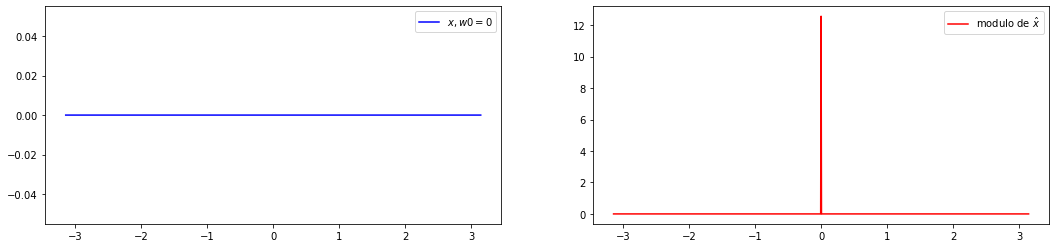

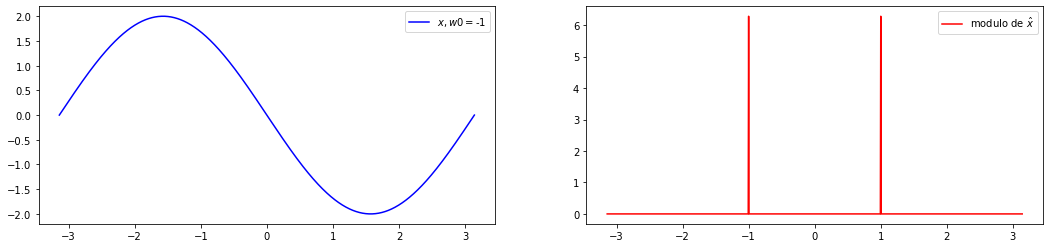

In [4]:
funcion1(2)
funcion1(1)
funcion1(0.5)
funcion1(0)
funcion1(-1)

Notamos como varia la frecuencia de la onda al variar los valores de $w_0$.

2. si $x(t) = 2\sin(2\omega_0t+2/3) =  \frac{e^{i(2\omega_0t+2/3)}-e^{-i(2\omega_0t+2/3)}}{i}$, entonces 

$$\hat x(\omega) = \frac{2\pi}{i}(e^{i2/3}\delta(\omega-2\omega_0)-e^{-i2/3}\delta(\omega+2\omega_0))$$

y luego

$$|\hat x(\omega)| = 2\pi( \delta(\omega-2\omega_0) + \delta(\omega+2\omega_0)) $$

In [5]:
def funcion2(w0):
    x = 2*np.sin(2*w0*t+2/3)
    n_w0 = int((L+2*w0) * N/(2*L))
    minus_n_w0 = int((L-2*w0) * N/(2*L))
    xhatmod = 2*np.pi*(signal.unit_impulse(N, n_w0) + signal.unit_impulse(N, minus_n_w0))

    fig, ax = plt.subplots(1, 2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-',  label='$x, w0=$'+str(w0))
    o2 = ax[1].plot(w, xhatmod, 'r-', label='modulo de $\hat x$')
    ax[0].legend()
    ax[1].legend()


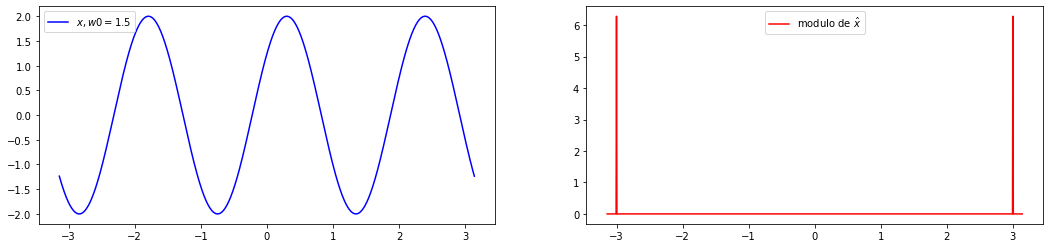

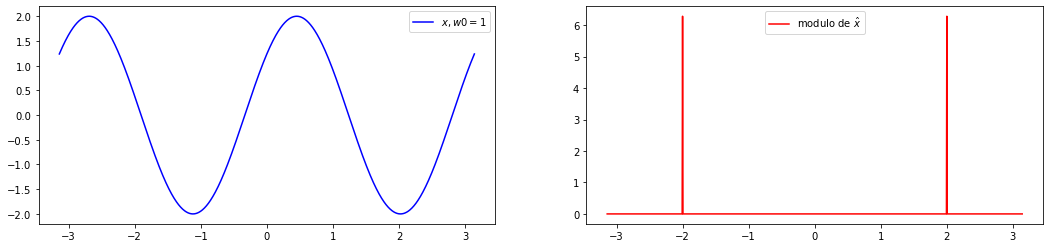

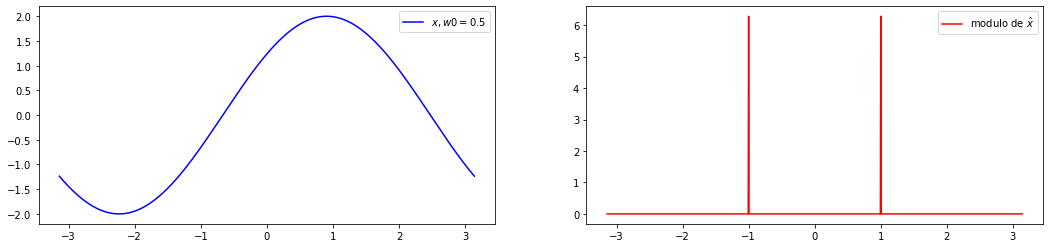

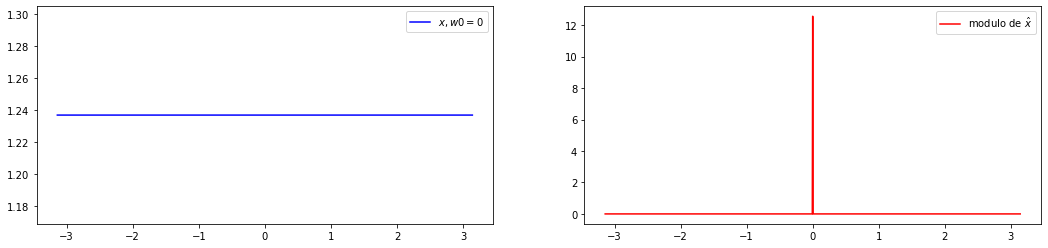

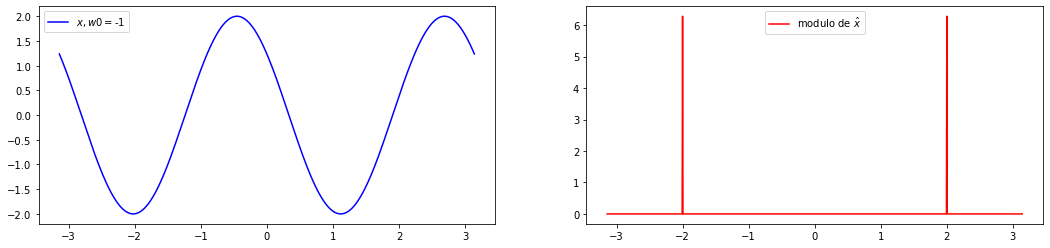

In [6]:
funcion2(1.5)
funcion2(1)
funcion2(0.5)
funcion2(0)
funcion2(-1)


3. si $x(t) = 2\cos(\omega_0t)+\sin(\omega_0t) = e^{i\omega_0t}-e^{-i\omega_0t}+ \frac{e^{i\omega_0t}-e^{-i\omega_0t}}{2i}$ , entonces (quizas colocar mas lineas de la demosttracion de la transformada)

$$\hat x(\omega) = (2\pi+\frac{\pi}{i})(\delta(\omega-\omega_0) - \delta(\omega+\omega_0)) $$

y luego

$$|\hat x(\omega)| = \pi\sqrt{5}( \delta(\omega-\omega_0) + \delta(\omega+\omega_0)) $$

In [7]:
def funcion3(w0):
    x = 2*np.cos(w0*t)+np.sin(w0*t)
    n_w0 = int((L+w0) * N/(2*L))
    minus_n_w0 = int((L-w0) * N/(2*L))
    xhatmod = 5**0.5*np.pi*(signal.unit_impulse(N, n_w0) + signal.unit_impulse(N, minus_n_w0))

    fig, ax = plt.subplots(1, 2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-',  label='$x, w0=$'+str(w0))
    o2 = ax[1].plot(w, xhatmod, 'r-', label='modulo de $\hat x$')
    ax[0].legend()
    ax[1].legend()

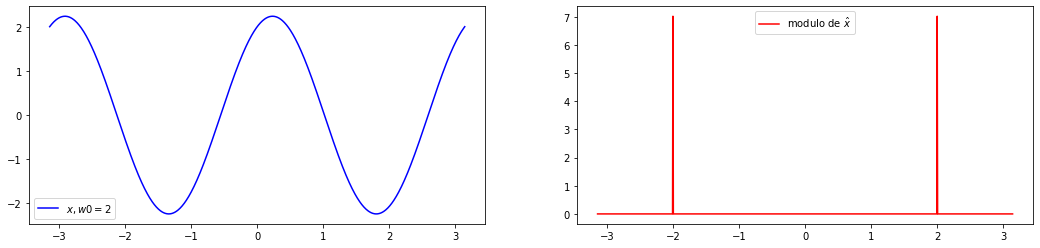

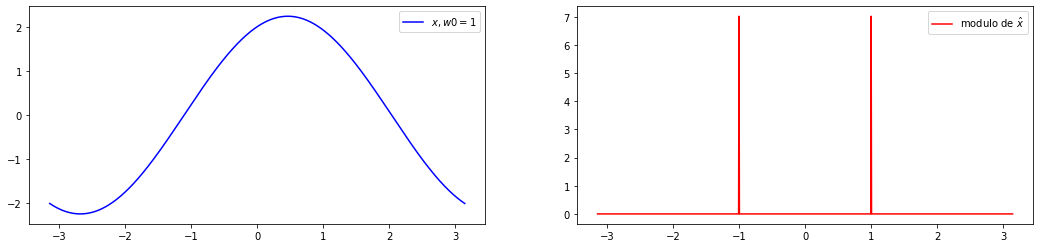

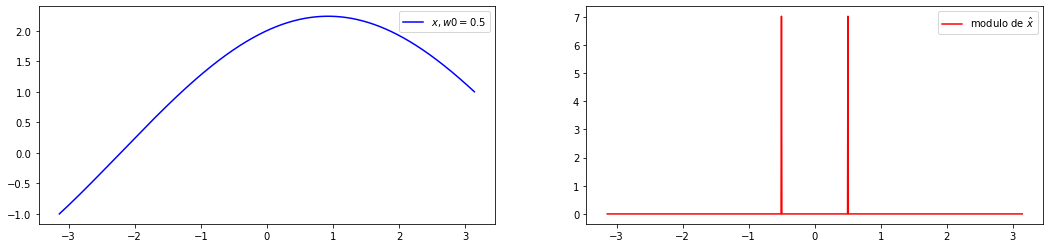

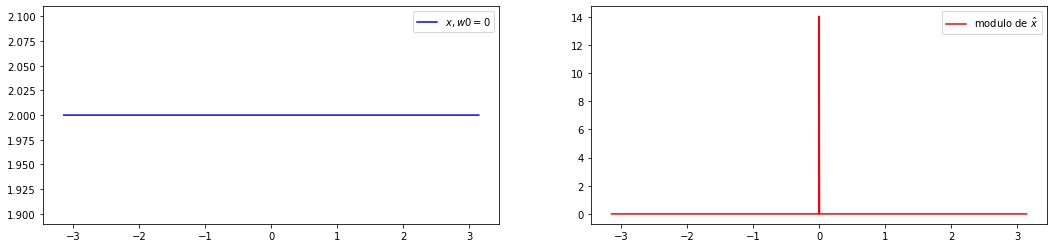

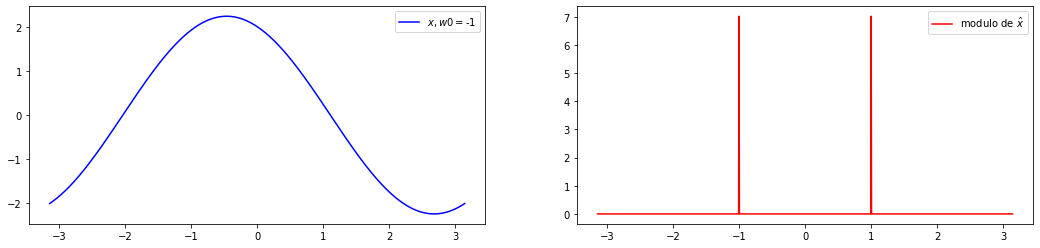

In [8]:
funcion3(2)
funcion3(1)
funcion3(0.5)
funcion3(0)
funcion3(-1)

4. si $x(t) = 1$ , entonces (quizas colocar mas lineas de la demosttracion de la transformada)

$$\hat x(\omega) = 2\pi\delta(\omega)$$

y luego

$$|\hat x(\omega)| = 2\pi\delta(\omega) $$

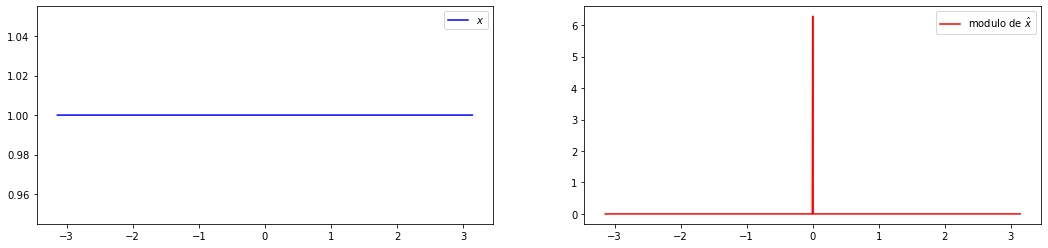

In [9]:
x = np.ones(len(t))
n_w0 = int((L) * N/(2*L))
xhatmod = 2*np.pi*(signal.unit_impulse(N, n_w0))

fig, ax = plt.subplots(1, 2,figsize=(18,4))
o1 = ax[0].plot(t, x, 'b-',  label='$x$')
o2 = ax[1].plot(w, xhatmod, 'r-', label='modulo de $\hat x$')
ax[0].legend()
ax[1].legend()

# Ejercicio 2 - Calculo de la Transformada de Fourier

1.  Si $x(t) = e^{-at}\gamma(t)$, entonces



\begin{eqnarray}
  \hat x(\omega) &=& \int_0^\infty e^{-at} e^{-i \omega t} dt  \\
                 &=& \int_0^\infty e^{-(a +i \omega) t} dt \\
                 &=& \left[ \frac{e^{-(a +i \omega) t}}{-(a +i \omega)} \right]_0^\infty \\
                 &=&  \frac{1}{(a +i \omega)}
\end{eqnarray}  

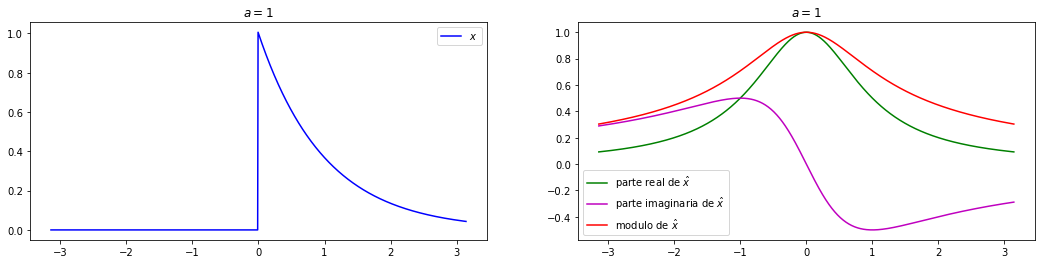

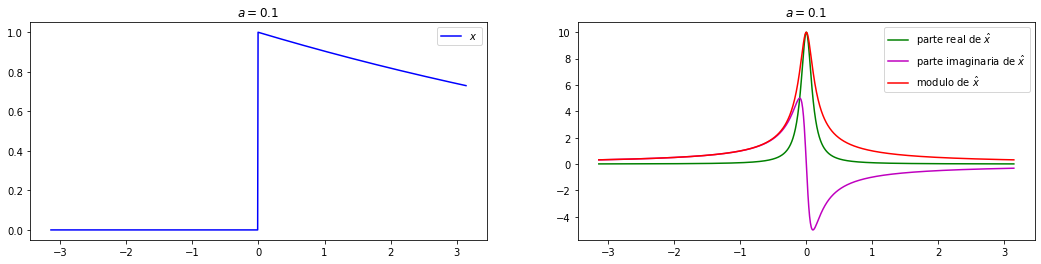

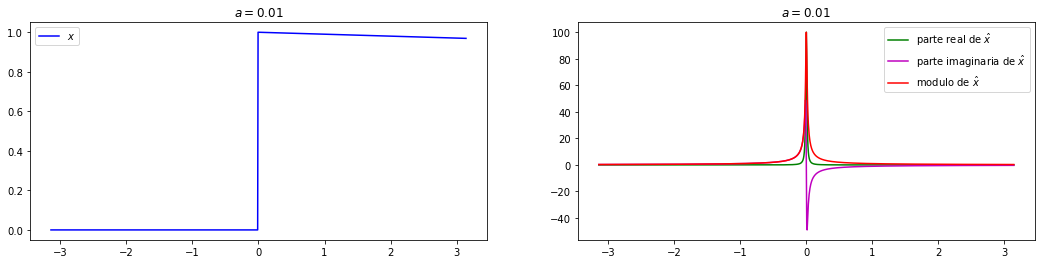

In [10]:
for a in [1, .1, .01]:
    
    x = np.exp(-a*t) 
    x[:int(N/2)-1] = 0
    xhat = 1/(a+1j*omega)

    fig, ax = plt.subplots(1,2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-', label='$x$')
    o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat x$')
    o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat x$')
    o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat x$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')

2.  Si $x(t) = e^{-a|t|}$, entonces



\begin{eqnarray}
  \hat x(\omega) &=& \int_{-\infty}^\infty e^{-a|t|} e^{-i \omega t} dt  \\
                 &=& \int_{-\infty}^0 e^{at} e^{-i \omega t} dt + \int_0^\infty e^{-at} e^{-i \omega t} dt  \\
                 &=& -\int_0^\infty e^{-t(i\omega-a)} dt + \int_0^\infty e^{-t(i\omega+a) } dt \\
                 &=& -\left[ \frac{e^{-t(i\omega-a)}}{-(i\omega-a)} \right]_0^\infty +\left[ \frac{e^{-t(i\omega +a)}}{-(i \omega +a)} \right]_0^\infty \\
                 &=&  \frac{-1}{(i\omega-a)} + \frac{1}{(i\omega+a)}  \\
                 &=&  \frac{2a}{\omega^2+a^2}
\end{eqnarray}  

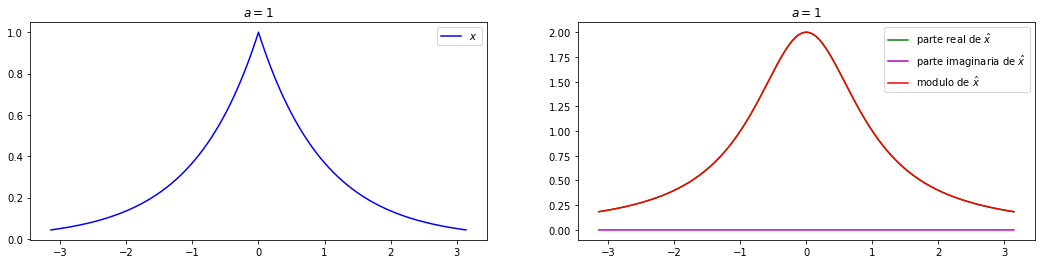

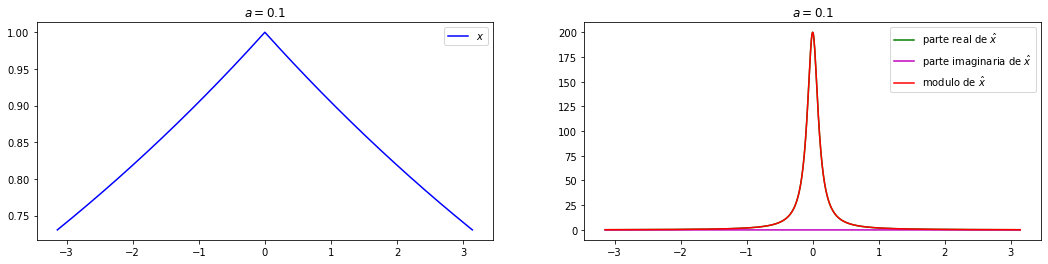

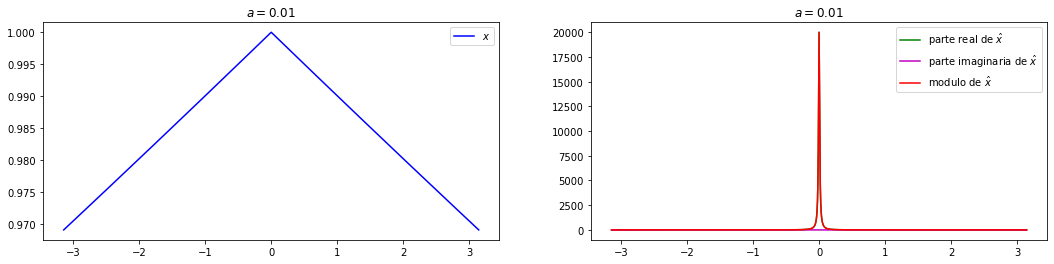

In [12]:
for a in [1, .1, .01]:
    
    x = np.exp(-a*abs(t)) 
    xhat = 2/(a**2+omega_2)

    fig, ax = plt.subplots(1,2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-', label='$x$')
    o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat x$')
    o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat x$')
    o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat x$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')

3. Si $x(t)=\frac{1}{1+t^2}$ y sabiendo del Ejercicio 2.2 que al considerar $a=1$ tenemos que $$y(t)=e^{-|t|} \rightarrow \hat y(w)=\frac{2}{\omega^2+1}$$ \\

Luego, por definicion de la Transformada de Fourier inversa sobre $y(t)$
$$e^{-|t|}=\frac{1}{2\pi}\int_{-\infty}^{\infty}\frac{2}{\omega^2+1}e^{-iwt}d\omega $$ \
$\Rightarrow$ $$\pi e^{-|t|}=\int_{-\infty}^{\infty}\frac{1}{\omega^2+1}e^{-iwt}d\omega $$ \
De esta igualdad notamos que $$\hat x(\omega)=\pi e^{-|\omega|}$$

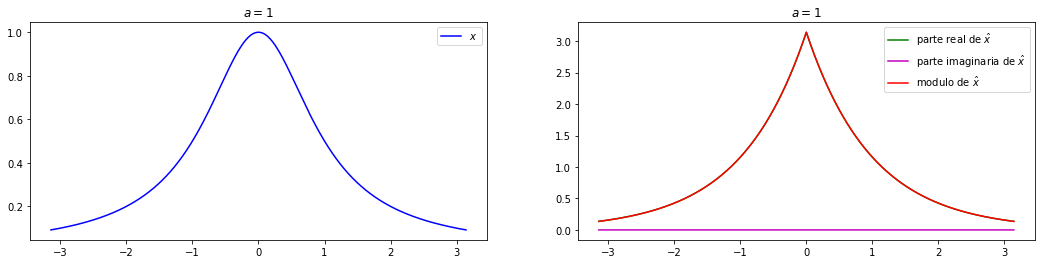

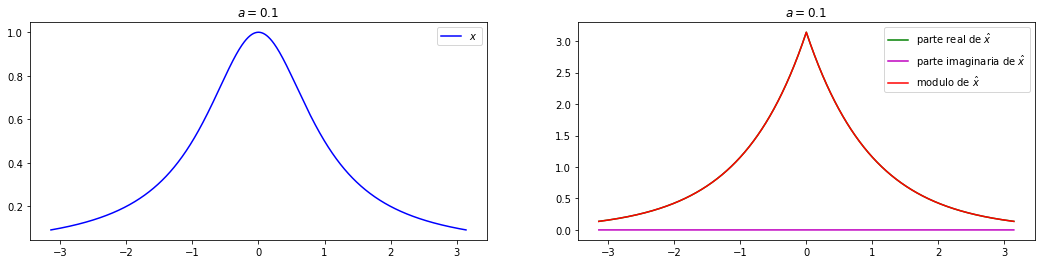

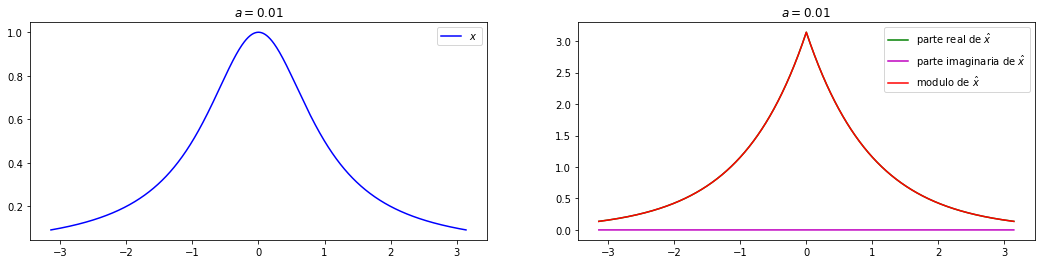

In [13]:
for a in [1, .1, .01]:
    
    x = 1/(1+t_2)
    xhat = np.pi*np.exp(-abs(omega))

    fig, ax = plt.subplots(1,2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-', label='$x$')
    o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat x$')
    o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat x$')
    o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat x$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')

4. Si $x(t)=\frac{1}{2-2t+t^2}$ y sabiendo del Ejercicio 2.3 que $$y(t)=\frac{1}{1+t^2} \rightarrow \hat y(w)=\pi e^{-|\omega|}$$ \\

Ademas, recordando la propiedad $$\mathbb{F}[y(t-a)] = e^{-iaw}\hat y(w)$$ \
Tenemos que si consideramos $a=1$ obtenemos $$\hat x(\omega)=\mathbb{F}[\frac{1}{2-2t+t^2}]=\mathbb{F}[y(t-1)]=e^{-iw}\hat y(w)=\pi e^{-iw}e^{-|\omega|}$$

$\Rightarrow$ $$\hat x(\omega)=\pi e^{-iw}e^{-|\omega|}$$ 

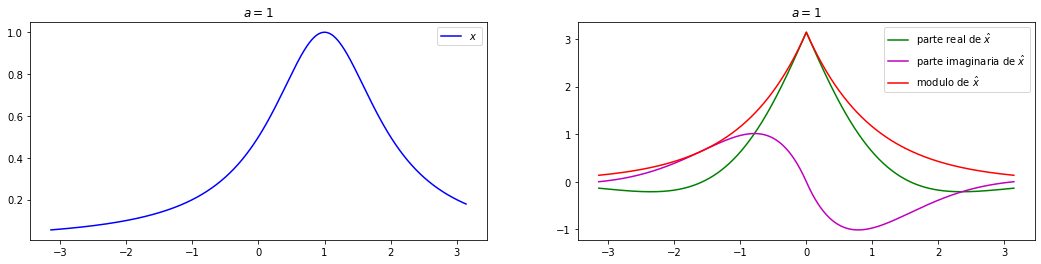

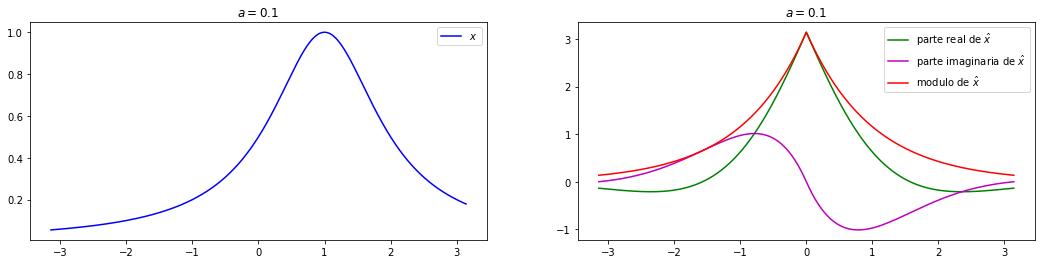

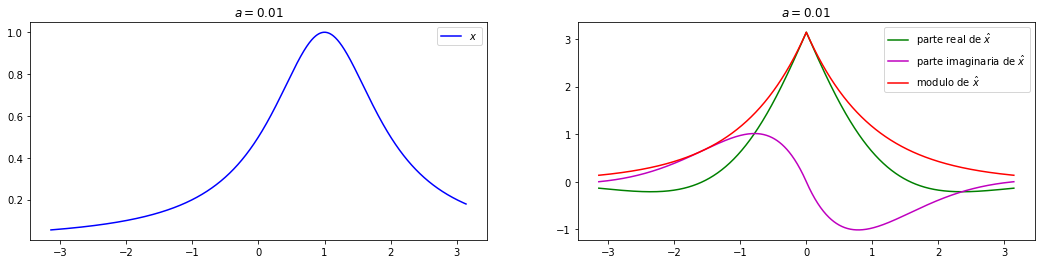

In [11]:
for a in [1, .1, .01]:
    
    x = 1/(2-2*t+t_2)
    xhat = np.pi*np.exp(-abs(omega))*np.exp(-1j*omega)

    fig, ax = plt.subplots(1,2,figsize=(18,4))
    o1 = ax[0].plot(t, x, 'b-', label='$x$')
    o2 = ax[1].plot(w, np.real(xhat), 'g-', label='parte real de $\hat x$')
    o2 = ax[1].plot(w, np.imag(xhat), 'm-', label='parte imaginaria de $\hat x$')
    o2 = ax[1].plot(w, np.abs(xhat), 'r-', label='modulo de $\hat x$')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(f'$a = {a}$')
    ax[1].set_title(f'$a = {a}$')

# Ejercicio 3 - Filtro medio

Definimos la función rectangular por 

\begin{equation}
\label{rect}
    \Pi_T(t) =     \begin{cases}
      \frac 1T & \text{si } |t| < \frac{T}{2}\\
      \frac 1{2T} & \text{si } |t| = \frac{T}{2}  \\
      0 & \text{si no}
    \end{cases} \,.
\end{equation}

El filtro medio, parametrizado por $T>0$, calcula el promedio de la señal en una ventana deslizante de largo $T$. 

1. Su respuesta impulsional es la la función rectangular definida por:

$$h(t) = \Pi_T(t - T/2)$$



Text(0.5, 1.0, 'respuesta impusional filtro medio con T=1.5707963267948966')

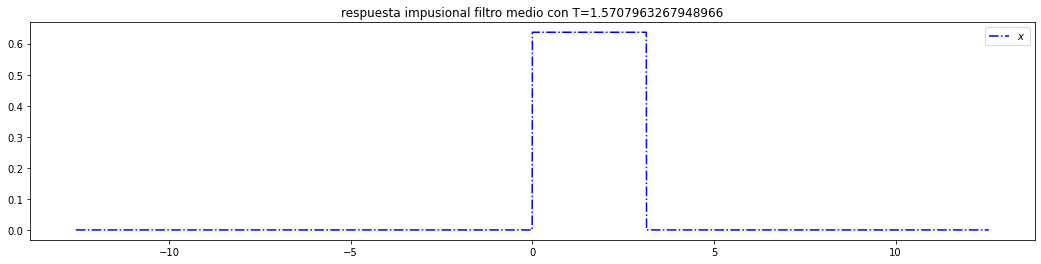

In [18]:
N = 8*2**10 + 1 # 1025
L = 4*np.pi 

t = np.linspace(-L, L, N)
w = t

T = np.pi/2

h = np.zeros_like(t)

# Definimos la funcion rectangular
n_zero = int(N/2)+int(T * N/(2*L))-1
n_min = n_zero - int(T * N/(2*L))
n_max = n_zero + int(T * N/(2*L))
h[n_min+1:n_max] = 1/T
h[n_min] = 1/(2*T)
h[n_max] = 1/(2*T)

#Graficamos La respuesta impulsional
fig, ax1 = plt.subplots(1, 1,figsize=(18,4))
ax1.plot(t, h, 'b-.',  label='$x$')
ax1.legend()
ax1.set_title('respuesta impusional filtro medio con T='+str(np.pi/2))

Aqui veemos si es causal o no

2. Para encontrar la respuesta impulsional, calculamos la transformada de Fourier de $h$:

\begin{eqnarray}
    \mathcal F (h)(\omega) &=& \frac 1T \int_{-T/2}^{T/2} e^{-i\omega t} dt \\
    &=& \left[ - \frac{e^{-i\omega t}}{i\omega T} \right]_{-T/2}^{T/2} \\
    &=& \frac{e^{i\omega T} - e^{-i\omega T}}{i\omega T}  \\
    &=& \frac{\sin(\omega T)}{\omega T} \\
    &=& \text{sinc}(\omega T)
\end{eqnarray}

(a) Si $x(t)=1$ entonces

$$L[x](t)=\hat h_{L}(w)=\mathcal F (h)(\omega)=\frac{\sin(\omega T)}{\omega T}$$

In [19]:
# Calculamos la salida de x(t)
sc = np.zeros_like(w)
w_zero = int(N/2)
sc[w_zero] = 1
sc[:w_zero] = 1/T * np.sin(T*w)[:w_zero]/w[:w_zero]
sc[w_zero+1:] = 1/T * np.sin(T*w)[w_zero+1:]/w[w_zero+1:]

#Calculamos la respuesta impulsional centrada en cero
h1 = np.zeros_like(t)

n_zero = int(N/2)-1
n_min = n_zero - int(T * N/(2*L))
n_max = n_zero + int(T * N/(2*L))
h1[n_min:n_zero] = 1/T
h1[n_zero] = 1/(2*T)
h1[n_zero+1:n_max] = 1/T

Text(0.5, 1.0, 'Salida del sistema lineal')

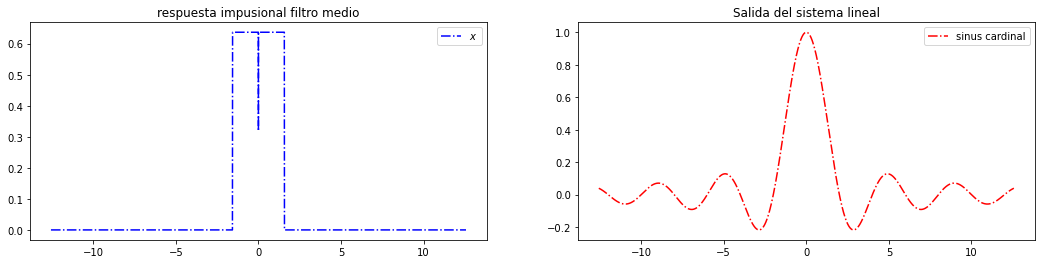

In [20]:
fig, ax = plt.subplots(1, 2,figsize=(18,4))
ax[0].plot(t, h1, 'b-.',  label='$x$')
ax[0].legend()
ax[0].set_title('respuesta impusional filtro medio')

ax[1].plot(w, sc, 'r-.',  label='sinus cardinal')
ax[1].legend()
ax[1].set_title('Salida del sistema lineal')